In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

from halomod import TracerHaloModel
import halomod
import hmf

In [2]:
'''
Labels = ['0-Number_particles', '1-M200', '2-Mtot','3-Mvir','4-MFOF', '5-R200', '6-Rvir', '7-Offset', 
          '8-kinetic_energy', '9-potential_energy', '10-energy_ratio',
          '11-angular_momentum','12-spin_parameter', '13-Sigma3D', '14-Sigma1D',
          '15-Sigma_major','16-Sigma_semi','17-Sigma_minor','18-Sigmav',
          '19-axis_ratio_c/a','20-axis_ratio_b/a','21-rho_1Mpc','22-rho_2.5Mpc','23-rho_5Mpc',
          '24-rho_10N','25-rho_20N','26-rho_64N','27-particle_mass', '28-box_size',
          '29-N_subhalos','30-m200_subhalo','31-Mvir_subhalo','32-Mtot_subhalo','33-Mfof_subhalo',
          '34-Sigma_subhalos','35-Vmax','36-Vmax_subhalo',
          '37-fraction_subhalo','38-fraction_v_subhalo','39-formation_time','40-accretion_rate'] 
'''
S1 = np.loadtxt('./data/L31pt25_N512/L31pt25_N512.txt',  skiprows=1)
S2 = np.loadtxt('./data/L62pt5_N512/L62pt5_N512.txt',  skiprows=1)
S3 = np.loadtxt('./data/L125_N512/L125_N512.txt',  skiprows=1)
S4 = np.loadtxt('./data/L250_N512/L250_N512.txt',  skiprows=1)
S5 = np.loadtxt('./data/L500_N512/L500_N512.txt',  skiprows=1)
S6 = np.loadtxt('./data/L1000_N512/L1000_N512.txt',  skiprows=1)

S1 = S1[S1[:,0]>600]
S2 = S2[S2[:,0]>600]
S3 = S3[S3[:,0]>600]
S4 = S4[S4[:,0]>600]
S5 = S5[S5[:,0]>600]
S6 = S6[S6[:,0]>600]
# BoxSize = L125_512[1,28]
# L125_512 = L125_512[L125_512[:,0]>600]
# print(L125_512.shape, BoxSize)

/tmp/ipykernel_1610325/716847555.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')
/tmp/ipykernel_1610325/716847555.py:28: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


(-9.0, 1.0)

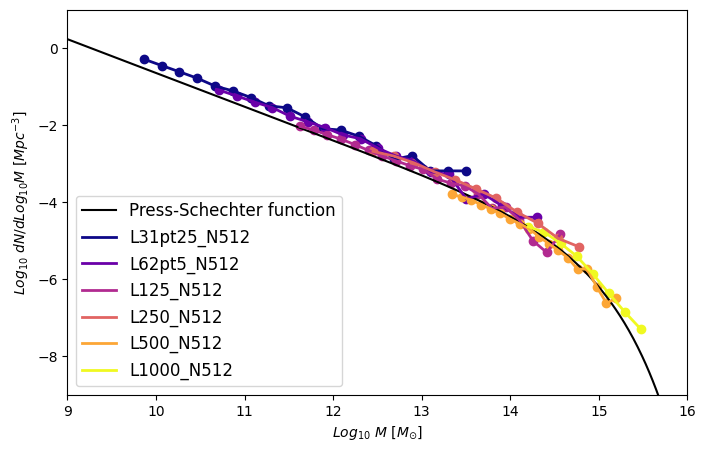

In [3]:
SS1 = S1[S1[:,0]>600]
SS2 = S2[S2[:,0]>600]
SS3 = S3[S3[:,0]>600]
SS4 = S4[S4[:,0]>600]
SS5 = S5[S5[:,0]>600]
SS6 = S6[S6[:,0]>600]

h = 0.6774
### Press-Schechter function ###
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

datasets = [SS1, SS2, SS3, SS4, SS5, SS6]
numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

###  Halo mass function
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
        # Filtering out points based on conditions
    if idx == 1:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 2:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 4:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 5:
        lm = lm[2:]
        ldndlm = ldndlm[2:]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, color=color, label=label)
    
# plt.legend(fontsize=9,loc='upper right')
plt.legend(fontsize=12,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
# plt.savefig('figures/halo_mass_function.png')

In [4]:
# m200 = S1[:,1]
# offset = S1[:,7]
# eta = S1[:,10]
# spin = S1[:,12]


# fig=plt.figure(figsize=(7,7))
# fig.subplots_adjust(wspace=0.0)
# fig.subplots_adjust(hspace=0.0)

# ax=fig.add_subplot(2,2,1)
# ax.scatter(np.log10(m200[eta>1.35])+10, np.log10(eta[eta>1.35]), s=4, color='seagreen')
# ax.scatter(np.log10(m200[eta<1.35])+10, np.log10(eta[eta<1.35]), s=4, color='b')
# plt.axhline(np.log10(1.35),color="black",linestyle=":",lw=2)
# ax.set_ylabel(r'$Log_{10}~\eta$')
# plt.ylim([-0.04,0.3])
# plt.tick_params(axis='x', which='both', bottom=True, top=False, labelleft=False)

# con3 = (spin < 0.07) & (eta < 1.35)
# ax=fig.add_subplot(2,2,2)
# ax.scatter(np.log10(spin[~con3]), np.log10(eta[~con3]), s=4, color='seagreen')
# ax.scatter(np.log10(spin[con3]), np.log10(eta[con3]), s=4, color='b')
# plt.axhline(np.log10(1.35),color="black",linestyle=":",lw=2)
# plt.axvline(np.log10(0.07),color="black",linestyle=":",lw=2)
# plt.ylim([-0.04,0.3])
# plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
# plt.tick_params(axis='x', which='both', bottom=True, top=False, labelleft=False)

# ax=fig.add_subplot(2,2,3)
# ax.scatter(np.log10(m200[offset>0.07])+10, np.log10(offset[offset>0.07]), s=4, color='seagreen')
# ax.scatter(np.log10(m200[offset<0.07])+10, np.log10(offset[offset<0.07]), s=4, color='b')
# plt.axhline(np.log10(0.07),color="black",linestyle=":",lw=2)
# plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")
# ax.set_ylabel(r'$Log_{10}~\Delta r$')
# plt.ylim([-3,0])

# con1 = (spin < 0.07) & (offset < 0.07)
# ax=fig.add_subplot(2,2,4)
# ax.scatter(np.log10(spin[~con1]), np.log10(offset[~con1]), s=4, color='seagreen',label='unrelaxed halos')
# ax.scatter(np.log10(spin[con1]), np.log10(offset[con1]), s=4, color='b',label='relaxed halos')
# plt.axhline(np.log10(0.07),color="black",linestyle=":",lw=2)
# plt.axvline(np.log10(0.07),color="black",linestyle=":",lw=2)
# ax.set_xlabel(r'$Log_{10}~\lambda$')
# plt.ylim([-3,0])
# plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
# legend = plt.legend(fontsize=12, bbox_to_anchor=(np.log10(2.1), 1.1))
# legend.get_texts()[0].set_color('seagreen')  
# legend.get_texts()[1].set_color('b')

In [5]:
# # 定义拟合函数
# G = 43
# def fit_function(x, k):
#     sigma, R200 = x
#     return k * sigma**2 * R200 / G

# datasets = [S1, S2, S3, S4, S5, S6]
# colors = plt.cm.winter(np.linspace(0, 1, len(datasets)))

# all_veldisp_3d = []
# all_R200 = []
# all_M200 = []

# for dataset in datasets:
#     veldisp_3d = dataset[:, 13]
#     R200 = dataset[:, 5]
#     M200 = dataset[:, 1]
#     all_veldisp_3d.extend(veldisp_3d)
#     all_R200.extend(R200)
#     all_M200.extend(M200)

# all_veldisp_3d = np.array(all_veldisp_3d)
# all_R200 = np.array(all_R200)
# all_M200 = np.array(all_M200)

# x_data = (all_veldisp_3d, all_R200)
# y_data = all_M200
# print(len(y_data))
# initial_guess = 2.0
# params, covariance = curve_fit(fit_function, x_data, y_data, p0=initial_guess)
# best_fit_k = params[0]
# print("最佳拟合值 (k):", best_fit_k)

# fig=plt.figure(figsize=(11,5))
# ax=fig.add_subplot(1,2,1)

# for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(fit_function((dataset[:, 13], dataset[:, 5]), best_fit_k))+10, s=2, color=color)
# # ax.scatter(np.log10(all_M200)+10, np.log10(fit_function((all_veldisp_3d, all_R200), best_fit_k))+10, s=4, color="b", label="Relaxed halos")

# xpoints = np.array([9.4, 15.8])
# ypoints = np.array([9.4, 15.8])
# ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
# ax.text(9.4,14.5,'Best Fit k=0.82', size=16, color='b')
# ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
# ax.set_ylabel(r'$Log_{10}~k\sigma^2 R_{200} / G~[M_{\odot}]$')
# ax.legend(fontsize=16, loc='upper left')

# ###############################

# datasets = [S1, S2, S3, S4, S5, S6]
# colors = plt.cm.summer(np.linspace(0, 1, len(datasets)))

# all_veldisp_3d_sub = []
# all_R200 = []
# all_M200 = []
# all_Nsub = []
# for dataset in datasets:
#     veldisp_3d_sub = dataset[:, 34]
#     R200 = dataset[:, 5]
#     M200 = dataset[:, 1]
#     Nsub = dataset[:,29]
#     all_veldisp_3d_sub.extend(veldisp_3d_sub)
#     all_R200.extend(R200)
#     all_M200.extend(M200)
#     all_Nsub.extend(Nsub)

# all_veldisp_3d_sub = np.array(all_veldisp_3d_sub)
# all_R200 = np.array(all_R200)
# all_M200 = np.array(all_M200)
# all_Nsub = np.array(all_Nsub)

# x_data = (all_veldisp_3d_sub, all_R200)
# y_data = all_M200
# # x_data = (all_veldisp_3d_sub[all_Nsub>10], all_R200[all_Nsub>10])
# # y_data = all_M200[all_Nsub>10]
# print(len(y_data))
# initial_guess = 2.0
# params, covariance = curve_fit(fit_function, x_data, y_data, p0=initial_guess)
# best_fit_k2 = params[0]
# print("最佳拟合值 (k):", best_fit_k2)

# ax=fig.add_subplot(1,2,2)

# for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(fit_function((dataset[:, 34], dataset[:, 5]), best_fit_k2))+10, s=2, color=color)
# # ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(fit_function((all_veldisp_3d_sub[all_Nsub>10], all_R200[all_Nsub>10]), best_fit_k2))+10, s=4, color="b", label="Halos (Nsub>10)")

# xpoints = np.array([9.4, 15.8])
# ypoints = np.array([9.4, 15.8])
# ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
# ax.text(9.4,14.5,'Best Fit k=0.77', size=16, color='g')
# ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
# ax.set_ylabel(r'$Log_{10}~k\sigma^2 R_{200} / G~[M_{\odot}]$')
# ax.legend(fontsize=16, loc='upper left')


In [6]:
# # 定义拟合函数
# G = 43
# def fit_function(x, k):
#     sigma, R200 = x
#     return k * sigma**2 * R200 / G

# datasets = [S1, S2, S3, S4, S5, S6]
# colors = plt.cm.winter(np.linspace(0, 1, len(datasets)))

# all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
# all_R200 = np.concatenate([dataset[:, 5] for dataset in datasets])
# all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
# all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
# all_eta = np.concatenate([dataset[:, 10] for dataset in datasets])
# all_spin = np.concatenate([dataset[:, 12] for dataset in datasets])
# all_Nparticles = np.concatenate([dataset[:, 0] for dataset in datasets])

# relaxed_condition = (all_Nparticles>600) & (all_offset < 0.07) & (all_eta < 1.3) & (all_spin < 0.07)

# x_data = (all_veldisp_3d[relaxed_condition], all_R200[relaxed_condition])
# y_data = all_M200[relaxed_condition]
# print(len(y_data))
# initial_guess = 2.0
# params, covariance = curve_fit(fit_function, x_data, y_data, p0=initial_guess)
# best_fit_k = params[0]
# print("最佳拟合值 (k):", best_fit_k)

# fig=plt.figure(figsize=(11,5))
# ax=fig.add_subplot(1,2,1)

# # for color in colors:
# #     ax.scatter(np.log10(all_M200[relaxed_condition]) + 10, np.log10(fit_function((all_veldisp_3d[relaxed_condition], all_R200[relaxed_condition]), best_fit_k)) + 10, s=2, color=color, label='Relaxed halos')
# ax.scatter(np.log10(all_M200[relaxed_condition]) + 10, np.log10(fit_function((all_veldisp_3d[relaxed_condition], all_R200[relaxed_condition]), best_fit_k)) + 10, s=2, color='g', label='Relaxed halos')

# xpoints = np.array([9.4, 15.8])
# ypoints = np.array([9.4, 15.8])
# ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
# ax.text(9.4,14,'Best Fit k=0.86', size=16, color='g')
# ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
# ax.set_ylabel(r'$Log_{10}~k\sigma^2 R_{200} / G~[M_{\odot}]$')
# ax.legend(fontsize=16, loc='upper left')

# ###############################

# datasets = [S1, S2, S3, S4, S5, S6]
# colors = plt.cm.summer(np.linspace(0, 1, len(datasets)))

# all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
# all_R200 = np.concatenate([dataset[:, 5] for dataset in datasets])
# all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
# all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])

# # x_data = (all_veldisp_3d_sub, all_R200)
# # y_data = all_M200
# x_data = (all_veldisp_3d_sub[all_Nsub>10], all_R200[all_Nsub>10])
# y_data = all_M200[all_Nsub>10]
# print(len(y_data))
# initial_guess = 2.0
# params, covariance = curve_fit(fit_function, x_data, y_data, p0=initial_guess)
# best_fit_k2 = params[0]
# print("最佳拟合值 (k):", best_fit_k2)

# ax=fig.add_subplot(1,2,2)

# # for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
# #     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(fit_function((dataset[:, 34], dataset[:, 5]), best_fit_k2))+10, s=2, color=color)
# ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(fit_function((all_veldisp_3d_sub[all_Nsub>10], all_R200[all_Nsub>10]), best_fit_k2))+10, s=4, color="b", label="Halos (Nsub>10)")

# xpoints = np.array([9.4, 15.8])
# ypoints = np.array([9.4, 15.8])
# ax.plot(xpoints, ypoints, color="black", linestyle="--",label=r"$M_{\sigma} = M_{200}$")
# ax.text(9.4,14,'Best Fit k=0.77', size=16, color='b')
# ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
# ax.set_ylabel(r'$Log_{10}~k\sigma^2 R_{200} / G~[M_{\odot}]$')
# ax.legend(fontsize=16, loc='upper left')

/tmp/ipykernel_1610325/129492987.py:38: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub)
/tmp/ipykernel_1610325/129492987.py:52: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
/tmp/ipykernel_1610325/129492987.py:86: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
/tmp/ipykernel_1610325/129492987.py:95: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")


Text(0, 0.5, '$Log_{10}~\\sigma$ [km s$^{-1}$]')

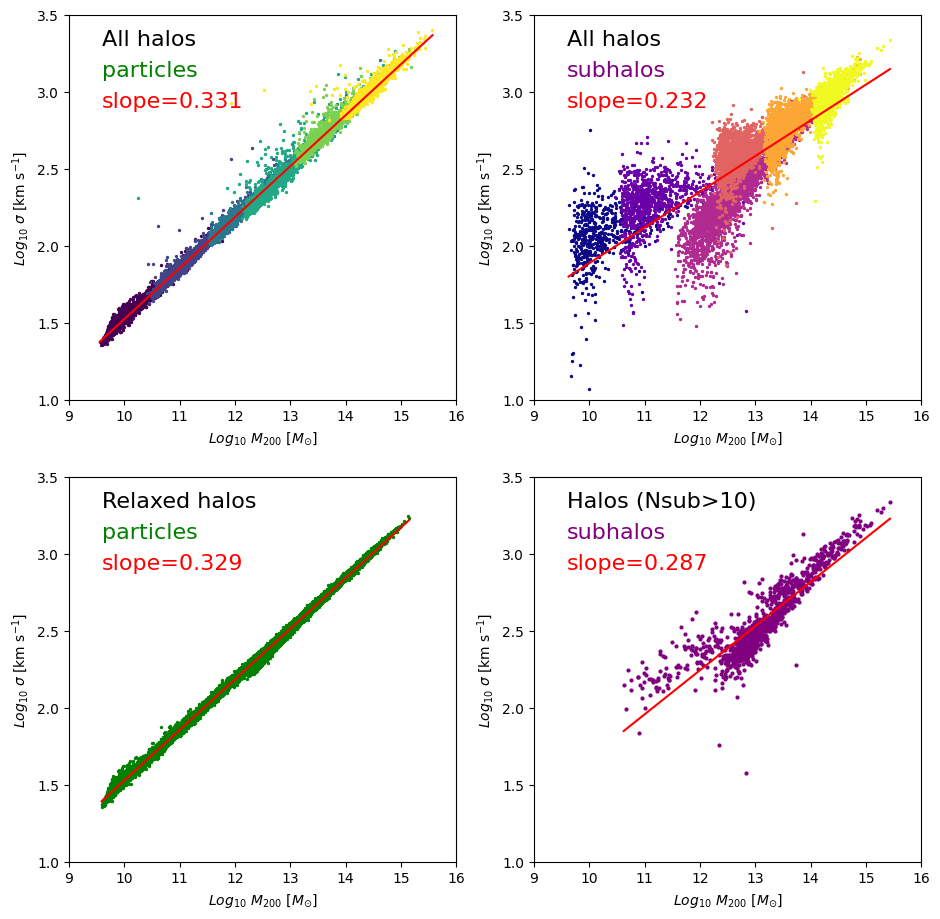

In [7]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
all_R200 = np.concatenate([dataset[:, 5] for dataset in datasets])
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
all_eta = np.concatenate([dataset[:, 10] for dataset in datasets])
all_spin = np.concatenate([dataset[:, 12] for dataset in datasets])
all_Nparticles = np.concatenate([dataset[:, 0] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])

x = np.log10(all_M200) + 10
y = np.log10(all_veldisp_3d)
# print(len(x), len(y), min(x), max(x), min(y), max(y))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

fig=plt.figure(figsize=(11,11))
ax=fig.add_subplot(2,2,1)
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    # ax.scatter(np.log10(dataset[:, 1])+10, np.log10(fit_function((dataset[:, 13], dataset[:, 5]), best_fit_k))+10, s=2, color=color)
    # ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 13]**2*dataset[:,5]/43/dataset[:, 1]), s=2, color=color)
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 13]), s=2, color=color)
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit')   
plt.ylim(1,3.5) 
plt.xlim(9,16)  
ax.text(9.6,3.1,'particles', size=16, color='g')
ax.text(9.6,3.3,'All halos', size=16, color='black')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# ax.legend(fontsize=16, loc='upper left')

all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
x = np.log10(all_M200) + 10
y = np.log10(all_veldisp_3d_sub)

valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))
ax=fig.add_subplot(2,2,2)
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    # ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]**2*dataset[:,5]/43/dataset[:, 1]), s=2, color=color)
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit')  
plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'All halos', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# ax.legend(fontsize=16, loc='upper left')

relaxed_condition = (all_Nparticles>600) & (all_offset < 0.07) & (all_eta < 1.3) & (all_spin < 0.07)

x = np.log10(all_M200[relaxed_condition]) + 10
y = np.log10(all_veldisp_3d[relaxed_condition])

slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

ax=fig.add_subplot(2,2,3)
ax.scatter(np.log10(all_M200[relaxed_condition]) + 10, np.log10(all_veldisp_3d[relaxed_condition]), s=2, color='g', label='Relaxed halos')
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit') 
plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.1,'particles', size=16, color='g')
ax.text(9.6,3.3,'Relaxed halos', size=16, color='black')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')

all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])

x = np.log10(all_M200[all_Nsub>10]) + 10
y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

ax=fig.add_subplot(2,2,4)
ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit') 
plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'Halos (Nsub>10)', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')

# plt.savefig('figures/mass_velocity_dispersion.png')

0.33563018186098464
0.33459902131684155
0.33163236450487554
0.32574526386316904
0.3253132482075718
0.338738494615381
0.3265435044501218
0.3304362020053052


/tmp/ipykernel_1610325/1507597712.py:57: RuntimeWarning: invalid value encountered in log10
  group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]


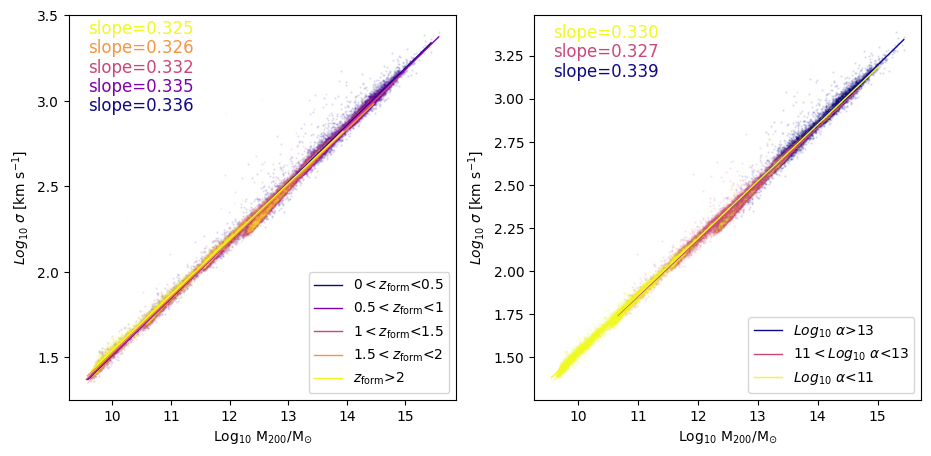

In [8]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
group_ranges = [(0, 0.5), (0.5, 1),(1, 1.5),(1.5, 2), (2, np.inf)]
fit_results = {}
labels= [r"$0<z_{\rm form}$<0.5",r"$0.5<z_{\rm form}$<1",r"$1<z_{\rm form}$<1.5",r"$1.5<z_{\rm form}$<2",r"$z_{\rm form}$>2"]
colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((all_zform >= group_range[0]) & (all_zform < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d = np.log10(all_veldisp_3d[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.75 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d,  s=0.5, alpha=0.1, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=1, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend(loc='lower right')

####################################
ax=fig.add_subplot(1,2,2)

all_accretion_rate = np.concatenate([dataset[:, 40] for dataset in datasets])

# group_ranges = [(14, np.inf),(12, 14), (10, 12),(6, 10)]
group_ranges = [(13, np.inf),(11, 13), (6, 11)]
fit_results = {}
# labels= [r"$Log_{10}~\alpha$>14",r"$12<Log_{10}~\alpha$<14",r"$10<Log_{10}~\alpha$<12",r"$Log_{10}~\alpha$<10"]
labels= [r"$Log_{10}~\alpha$>13",r"$11<Log_{10}~\alpha$<13",r"$Log_{10}~\alpha$<11"]

colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d = np.log10(all_veldisp_3d[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.84 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d,  s=0.5, alpha=0.1, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=1, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend(loc='lower right')

# plt.savefig('figures/mass_veldisp_particles.png')

0.29911231952026185
0.27158923954423186
0.22407716617969448
0.16028010472225548
0.14799599570543862


/tmp/ipykernel_1610325/554258221.py:43: RuntimeWarning: divide by zero encountered in log10
  group_veldisp_3d_sub = np.log10(all_veldisp_3d_sub[group_indices])
/fred/oz009/mzhang/anaconda/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


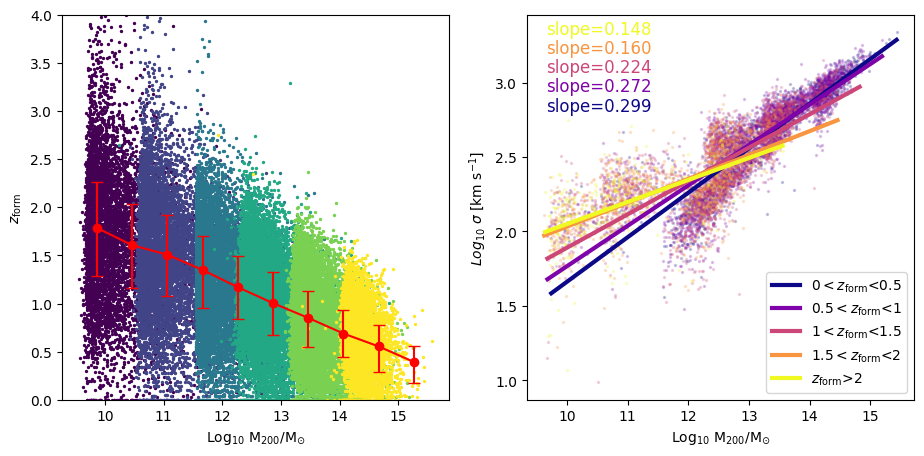

In [9]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])

x = np.log10(all_M200)+10
y = all_zform
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 39], s=2, color=color)

ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(0,4)

plt.ylabel(r"$z_{\rm form}$")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

###########################################
group_ranges = [(0, 0.5), (0.5, 1),(1, 1.5),(1.5, 2), (2, np.inf)]
fit_results = {}
labels= [r"$0<z_{\rm form}$<0.5",r"$0.5<z_{\rm form}$<1",r"$1<z_{\rm form}$<1.5",r"$1.5<z_{\rm form}$<2",r"$z_{\rm form}$>2"]
ax=fig.add_subplot(1,2,2)
colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((all_zform >= group_range[0]) & (all_zform < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d_sub = np.log10(all_veldisp_3d_sub[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d_sub)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d_sub
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.75 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d_sub,  s=2, alpha=0.2, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=3, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend()

# plt.savefig('figures/mass_zform.png')

0.3022751154945564
0.3508055719837994
0.1100887147717708
0.19803730809636208


/tmp/ipykernel_1610325/60040566.py:10: RuntimeWarning: invalid value encountered in log10
  y = np.log10(all_accretion_rate)+10
/tmp/ipykernel_1610325/60040566.py:29: RuntimeWarning: invalid value encountered in log10
  y_values = np.log10(dataset[:, 40]) + 10
/fred/oz009/mzhang/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/fred/oz009/mzhang/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/tmp/ipykernel_1610325/60040566.py:48: RuntimeWarning: invalid value encountered in log10
  group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
/tmp/ipykernel_1610325/60040566.py:50: RuntimeWarning: divide by zero encountered in log10
  group_veldisp_3d_sub = np.log10(all_veldisp_3d_sub[group_indic

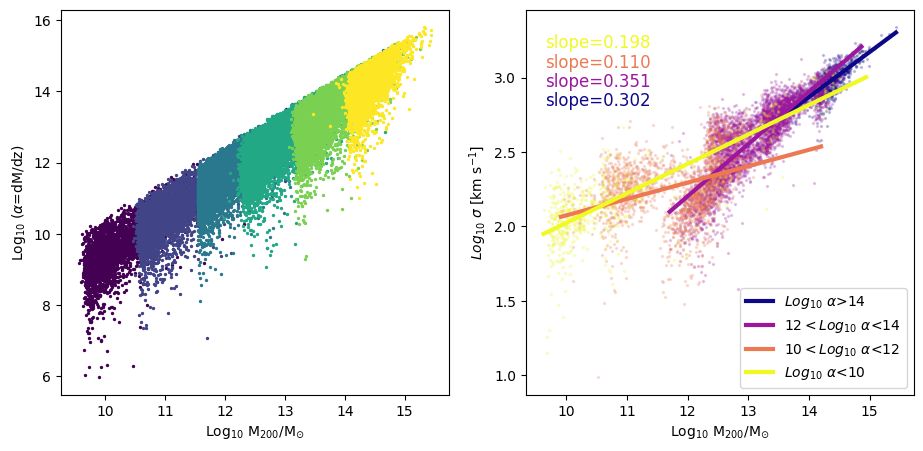

In [10]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_accretion_rate = np.concatenate([dataset[:, 40] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_accretion_rate)+10
x = x[y != 9]
y = y[y != 9]
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
# bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
# for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 40])+10, s=2, color=color)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 40]) + 10
    mask = y_values != 9  # Mask points where y_value is not equal to 9
    ax.scatter(x_values[mask], y_values[mask], s=2, color=color)
    
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

plt.ylabel(r"Log$_{10}~(\alpha$=dM/dz)")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

########################################################

group_ranges = [(14, np.inf),(12, 14), (10, 12),(6, 10)]
fit_results = {}
labels= [r"$Log_{10}~\alpha$>14",r"$12<Log_{10}~\alpha$<14",r"$10<Log_{10}~\alpha$<12",r"$Log_{10}~\alpha$<10"]
ax=fig.add_subplot(1,2,2)
colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

for i, group_range in enumerate(group_ranges):
    group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
    group_M200 = np.log10(all_M200[group_indices]) + 10
    group_veldisp_3d_sub = np.log10(all_veldisp_3d_sub[group_indices])
    
    slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d_sub)
    fit_results[group_range] = (slope_M200, intercept_M200)

    x = group_M200
    y = group_veldisp_3d_sub
    valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_x = np.linspace(min(x), max(x), 100)
    best_fit_y = slope * best_fit_x + intercept
    print(slope)
    ax.text(0.05, 0.75 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
    ax.scatter(group_M200, group_veldisp_3d_sub,  s=2, alpha=0.2, color=colors[i])
    # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
    ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=3, label=labels[i]) 

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
plt.legend(loc='lower right')
# plt.savefig('figures/mass_accretion_rate.png')

Text(0.5, 0, 'Log$_{10}$ M$_{200}$/M$_{\\odot}$')

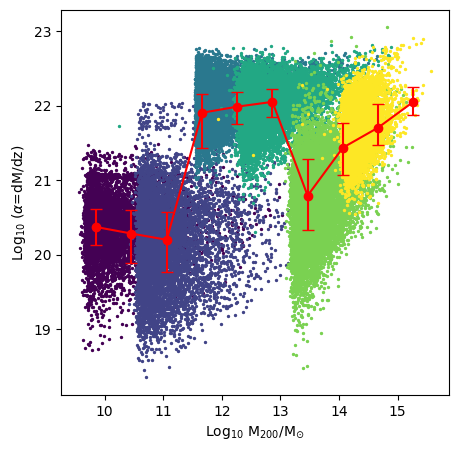

In [11]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_env1 = np.concatenate([dataset[:, 23] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_env1)+10
x = x[y != 9]
y = y[y != 9]
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
# bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
# for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
#     ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 40])+10, s=2, color=color)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 23]) + 10
    ax.scatter(x_values, y_values, s=2, color=color)
    
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

plt.ylabel(r"Log$_{10}~(\alpha$=dM/dz)")
plt.xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")

########################################################

# group_ranges = [(6, 10), (10, 12),(2, 14),(14, np.inf)]
# fit_results = {}
# labels= [r"$Log_{10}~\alpha$<10",r"$10<Log_{10}~\alpha$<12",r"$12<Log_{10}~\alpha$<14",r"$Log_{10}~\alpha$>14"]
# ax=fig.add_subplot(1,2,2)
# colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

# for i, group_range in enumerate(group_ranges):
#     group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
#     group_M200 = np.log10(all_M200[group_indices]) + 10
#     group_veldisp_3d_sub = np.log10(all_veldisp_3d_sub[group_indices])
    
#     slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d_sub)
#     fit_results[group_range] = (slope_M200, intercept_M200)

#     x = group_M200
#     y = group_veldisp_3d_sub
#     valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
#     x = x[valid_indices]
#     y = y[valid_indices]
#     slope, intercept, r_value, p_value, std_err = linregress(x, y)
#     best_fit_x = np.linspace(min(x), max(x), 100)
#     best_fit_y = slope * best_fit_x + intercept
#     print(slope)
#     ax.text(0.05, 0.75 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
#     ax.scatter(group_M200, group_veldisp_3d_sub,  s=2, alpha=0.2, color=colors[i])
#     # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
#     ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=3, label=labels[i]) 

# ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
# ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# plt.legend(loc='lower right')
# # plt.savefig('figures/mass_accretion_rate.png')

Text(0.5, 0, 'Log$_{10}$ Halo Mass [M$_{\\odot}$]')

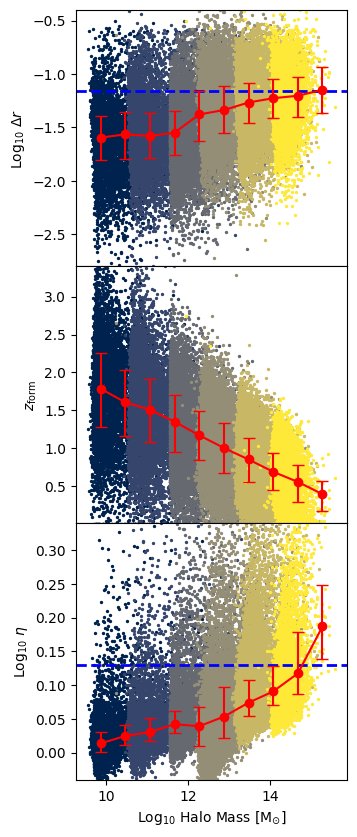

In [12]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_offset)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(3.5,10))

# fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.0)

ax=fig.add_subplot(3,1,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 7]), s=2, color=color)
plt.axhline(np.log10(0.07),color="b",linestyle="--",lw=2)  
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')

plt.ylim(-2.8,-0.4)
plt.ylabel(r"Log$_{10}~\Delta r$ ")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

#########################################################
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])

x = np.log10(all_M200)+10
y = all_zform
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])


ax=fig.add_subplot(3,1,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, dataset[:, 39], s=2, color=color)

ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(0.01,3.4)

plt.ylabel(r"$z_{\rm form}$")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

#########################################################
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_virial_ratio = np.concatenate([dataset[:, 10] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_virial_ratio)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])


ax=fig.add_subplot(3,1,3)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 10]), s=2, color=color)
plt.axhline(np.log10(1.35),color="b",linestyle="--",lw=2) 
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians,color='r')
plt.ylim(-0.04,0.34)

plt.ylabel(r"Log$_{10}~\eta$ ")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}$]")

# plt.savefig('figures/offset_zform_virialratio.png', bbox_inches='tight')

In [13]:
# h = 0.6774
# ### Press-Schechter function ###
# fig=plt.figure(figsize=(8,5))
# ax=fig.add_subplot(1,1,1)
# hm = TracerHaloModel(z=0, hmf_model="PS")
# ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# datasets = [S1, S2, S3, S4, S5, S6]
# # datasets = [SS1, SS2, SS3, SS4, SS5, SS6]
# numbins_list = []
# labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
# colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

# all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])


# ###  Halo mass function
# dlm = 0.1
# for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
#     numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
#     (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
#     lm = np.array([])
#     for i in range(len(lmbins)-1):
#         lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
#     ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
#     # print(np.array([lm, ldndlm]))
#         # Filtering out points based on conditions
#     if idx == 1:
#         lm = lm[1:15]
#         ldndlm = ldndlm[1:15]
#     elif idx == 2:
#         lm = lm[10:15]
#         ldndlm = ldndlm[10:15]
#     elif idx == 3:
#         lm = lm[10:18]
#         ldndlm = ldndlm[10:18]
#     elif idx == 4:
#         lm = lm[10:18]
#         ldndlm = ldndlm[10:18]
#     elif idx == 5:
#         lm = lm[10:19]
#         ldndlm = ldndlm[10:19]
#     elif idx == 6:
#         lm = lm[15:]
#         ldndlm = ldndlm[15:]
#     ax.scatter(lm, ldndlm, s=14, color='r')
#     ax.plot(lm, ldndlm, linewidth=2, color='r')

#     zform = dataset[:,39]
#     con1 = (zform>0) & (zform<1)
#     numbins1 = (np.max(np.log10(dataset[:,1][con1])) - np.min(np.log10(dataset[:,1][con1]))) / dlm
#     (num1, lmbins1) = np.histogram(np.log10(dataset[:,1][con1]) + 10, bins=20)
#     lm1 = np.array([])
#     for i in range(len(lmbins1)-1):
#         lm1 = np.append(lm1, 0.5 * (lmbins1[i] + lmbins1[i+1]))
#     ldndlm1 = np.log10(num1 / dataset[1, 28]**3 / dlm)

#     if idx == 1:
#         lm1 = lm1[1:12]
#         ldndlm1 = ldndlm1[1:12]
#     elif idx == 2:
#         lm1 = lm1[3:14]
#         ldndlm1 = ldndlm1[3:14]
#     elif idx == 3:
#         lm1 = lm1[10:14]
#         ldndlm1 = ldndlm1[10:14]
#     elif idx == 4:
#         lm1 = lm1[9:15]
#         ldndlm1 = ldndlm1[9:15]
#     elif idx == 5:
#         lm1 = lm1[8:15]
#         ldndlm1 = ldndlm1[8:15]
#     elif idx == 6:
#         lm1 = lm1[12:]
#         ldndlm1 = ldndlm1[12:]
        
#     ax.scatter(lm1, ldndlm1, s=8, color='g')
#     ax.plot(lm1, ldndlm1, linewidth=2,  color='g')

#     con2 = (zform>1) & (zform<2)
#     numbins2 = (np.max(np.log10(dataset[:,1][con2])) - np.min(np.log10(dataset[:,1][con2]))) / dlm
#     (num2, lmbins2) = np.histogram(np.log10(dataset[:,1][con2]) + 10, bins=20)
#     lm2 = np.array([])
#     for i in range(len(lmbins2)-1):
#         lm2 = np.append(lm2, 0.5 * (lmbins2[i] + lmbins2[i+1]))
#     ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)
    
#     if idx == 1:
#         lm2 = lm2[1:15]
#         ldndlm2 = ldndlm2[1:15]
#     elif idx == 2:
#         lm2 = lm2[5:15]
#         ldndlm2 = ldndlm2[5:15]
#     elif idx == 3:
#         lm2 = lm2[5:18]
#         ldndlm2 = ldndlm2[5:18]
#     elif idx == 4:
#         lm2 = lm2[10:18]
#         ldndlm2 = ldndlm2[10:18]
#     elif idx == 5:
#         lm2 = lm2[10:19]
#         ldndlm2 = ldndlm2[10:19]
#     elif idx == 6:
#         lm2 = lm2[15:]
#         ldndlm2 = ldndlm2[15:]
#     ax.scatter(lm2, ldndlm2, s=8, color='b')
#     ax.plot(lm2, ldndlm2, linewidth=2, color='b')

#     con3 = (zform>2) 
#     numbins3 = (np.max(np.log10(dataset[:,1][con3])) - np.min(np.log10(dataset[:,1][con3]))) / dlm
#     (num3, lmbins3) = np.histogram(np.log10(dataset[:,1][con3]) + 10, bins=20)
#     lm3 = np.array([])
#     for i in range(len(lmbins3)-1):
#         lm3 = np.append(lm3, 0.5 * (lmbins3[i] + lmbins3[i+1]))
#     ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)

#     if idx == 1:
#         lm3 = lm3[1:15]
#         ldndlm3 = ldndlm3[1:15]
#     elif idx == 2:
#         lm3 = lm3[5:15]
#         ldndlm3 = ldndlm3[5:15]
#     elif idx == 3:
#         lm3 = lm3[5:10]
#         ldndlm3 = ldndlm3[5:10]
#     elif idx == 4:
#         lm3 = lm3[15:16]
#         ldndlm3 = ldndlm3[15:16]
#     elif idx == 5:
#         lm3 = lm3[15:]
#         ldndlm3 = ldndlm3[15:]
#     elif idx == 6:
#         lm3 = lm3[20:]
#         ldndlm3 = ldndlm3[20:]
        
#     ax.scatter(lm3, ldndlm3, s=8, color='y')
#     ax.plot(lm3, ldndlm3, linewidth=2, color='y')

# custom_lines = [plt.Line2D([0], [0],  color='black'),
#                 plt.Line2D([0], [0],  color='r'),
#                 plt.Line2D([0], [0],  color='g'),
#                 plt.Line2D([0], [0],  color='b'),
#                 plt.Line2D([0], [0],  color='y')]
# ax.legend(custom_lines, ['Press-Schechter function', 'all halos', '0<$z_{form}$<1', '1<$z_{form}$<2', '$z_{form}$>2'], loc='best')

# # plt.legend(fontsize=9,loc='upper right')
# # plt.legend(fontsize=12,loc='lower left')
# ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
# ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
# ax.set_xlim((9,16))
# ax.set_ylim((-9,1))

In [14]:
datasets = [S1, S2, S3, S4, S5, S6]
numbins_list = []
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))


Allhmf = np.empty((0, 2)) 
Allhmf1 = np.empty((0, 2)) 
Allhmf2 = np.empty((0, 2)) 
Allhmf3 = np.empty((0, 2)) 
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:15]
        ldndlm = ldndlm[1:15]
    elif idx == 2:
        lm = lm[10:15]
        ldndlm = ldndlm[10:15]
    elif idx == 3:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 4:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 5:
        lm = lm[10:19]
        ldndlm = ldndlm[10:19]
    elif idx == 6:
        lm = lm[12:]
        ldndlm = ldndlm[12:]
    data = np.column_stack((lm, ldndlm))
    Allhmf = np.vstack((Allhmf, data))

###################################################
    zform = dataset[:,39]
    con1 = (zform>0) & (zform<1)
    numbins1 = (np.max(np.log10(dataset[:,1][con1])) - np.min(np.log10(dataset[:,1][con1]))) / dlm
    (num1, lmbins1) = np.histogram(np.log10(dataset[:,1][con1]) + 10, bins=20)
    lm1 = np.array([])
    for i in range(len(lmbins1)-1):
        lm1 = np.append(lm1, 0.5 * (lmbins1[i] + lmbins1[i+1]))
    ldndlm1 = np.log10(num1 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm1 = lm1[1:12]
        ldndlm1 = ldndlm1[1:12]
    elif idx == 2:
        lm1 = lm1[3:14]
        ldndlm1 = ldndlm1[3:14]
    elif idx == 3:
        lm1 = lm1[10:14]
        ldndlm1 = ldndlm1[10:14]
    elif idx == 4:
        lm1 = lm1[9:15]
        ldndlm1 = ldndlm1[9:15]
    elif idx == 5:
        lm1 = lm1[8:15]
        ldndlm1 = ldndlm1[8:15]
    elif idx == 6:
        lm1 = lm1[12:]
        ldndlm1 = ldndlm1[12:]
    data1 = np.column_stack((lm1, ldndlm1))
    Allhmf1 = np.vstack((Allhmf1, data1))

############################################
    con2 = (zform>1) & (zform<2)
    numbins2 = (np.max(np.log10(dataset[:,1][con2])) - np.min(np.log10(dataset[:,1][con2]))) / dlm
    (num2, lmbins2) = np.histogram(np.log10(dataset[:,1][con2]) + 10, bins=20)
    lm2 = np.array([])
    for i in range(len(lmbins2)-1):
        lm2 = np.append(lm2, 0.5 * (lmbins2[i] + lmbins2[i+1]))
    ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm2 = lm2[1:15]
        ldndlm2 = ldndlm2[1:15]
    elif idx == 2:
        lm2 = lm2[5:15]
        ldndlm2 = ldndlm2[5:15]
    elif idx == 3:
        lm2 = lm2[5:18]
        ldndlm2 = ldndlm2[5:18]
    elif idx == 4:
        lm2 = lm2[10:18]
        ldndlm2 = ldndlm2[10:18]
    elif idx == 5:
        lm2 = lm2[10:19]
        ldndlm2 = ldndlm2[10:19]
    elif idx == 6:
        lm2 = lm2[15:]
        ldndlm2 = ldndlm2[15:]
    data2 = np.column_stack((lm2, ldndlm2))
    Allhmf2 = np.vstack((Allhmf2, data2))

##############################################
    con3 = (zform>2) 
    numbins3 = (np.max(np.log10(dataset[:,1][con3])) - np.min(np.log10(dataset[:,1][con3]))) / dlm
    (num3, lmbins3) = np.histogram(np.log10(dataset[:,1][con3]) + 10, bins=20)
    lm3 = np.array([])
    for i in range(len(lmbins3)-1):
        lm3 = np.append(lm3, 0.5 * (lmbins3[i] + lmbins3[i+1]))
    ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm3 = lm3[1:15]
        ldndlm3 = ldndlm3[1:15]
    elif idx == 2:
        lm3 = lm3[5:15]
        ldndlm3 = ldndlm3[5:15]
    elif idx == 3:
        lm3 = lm3[5:18]
        ldndlm3 = ldndlm3[5:18]
    elif idx == 4:
        lm3 = lm3[15:18]
        ldndlm3 = ldndlm3[15:18]
    elif idx == 5:
        lm3 = lm3[16:]
        ldndlm3 = ldndlm3[16:]
    elif idx == 6:
        lm3 = lm3[18:]
        ldndlm3 = ldndlm3[18:]

    data3 = np.column_stack((lm3, ldndlm3))
    Allhmf3 = np.vstack((Allhmf3, data3))
print(Allhmf.shape, Allhmf1.shape, Allhmf2.shape, Allhmf3.shape)

(35, 2) (32, 2) (45, 2) (40, 2)


/tmp/ipykernel_1610325/2517703162.py:107: RuntimeWarning: divide by zero encountered in log10
  ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/2517703162.py:77: RuntimeWarning: divide by zero encountered in log10
  ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/2517703162.py:17: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


In [15]:
# print(Allhmf[:,0],Allhmf[:,1])
Allhmf = Allhmf[Allhmf[:, 1] != -np.inf]
Allhmf1 = Allhmf1[Allhmf1[:, 1] != -np.inf]
Allhmf2 = Allhmf2[Allhmf2[:, 1] != -np.inf]
Allhmf3 = Allhmf3[Allhmf3[:, 1] != -np.inf]

hmf = np.polyfit(Allhmf[:,0], Allhmf[:,1], 2)
hmf1 = np.polyfit(Allhmf1[:,0], Allhmf1[:,1], 2)
hmf2 = np.polyfit(Allhmf2[:,0], Allhmf2[:,1], 2)
hmf3 = np.polyfit(Allhmf3[:,0], Allhmf3[:,1], 2)

x = np.arange(9.8,15.7,0.2)
y = np.polyval(hmf,x)

x1 = np.arange(9.8,15.7,0.2)
y1 = np.polyval(hmf1,x1)
x2 = np.arange(9.8,15.2,0.2)
y2 = np.polyval(hmf2,x2)
x3 = np.arange(9.8,13.4,0.2)
y3 = np.polyval(hmf3,x3)

/tmp/ipykernel_1610325/2873532864.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')


(-9.0, 1.0)

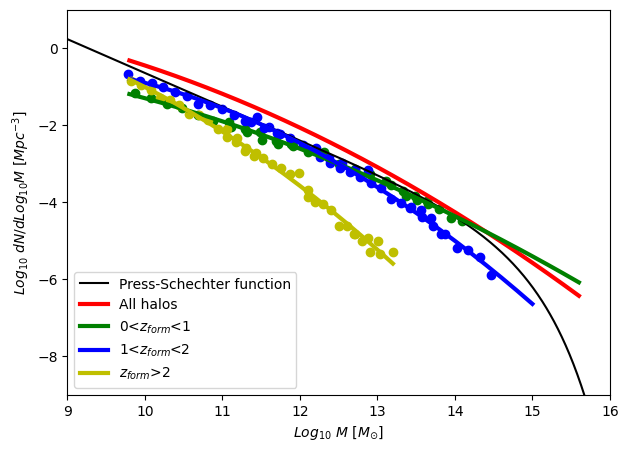

In [16]:
h = 0.6774
### Press-Schechter function ###
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(Allhmf[:,0], Allhmf[:,1])
ax.plot(x, y, color='r', linewidth=3, label='All halos')
ax.scatter(Allhmf1[:,0], Allhmf1[:,1], color='g')
ax.plot(x1, y1, color='g', linewidth=3, label='0<$z_{form}$<1')
ax.scatter(Allhmf2[:,0], Allhmf2[:,1], color='b')
ax.plot(x2, y2, color='b', linewidth=3, label='1<$z_{form}$<2')
ax.scatter(Allhmf3[:,0], Allhmf3[:,1], color='y')
ax.plot(x3, y3, color='y', linewidth=3, label='$z_{form}$>2')

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
# plt.savefig('figures/hmf_zform.png', bbox_inches='tight')

In [17]:
datasets = [S1, S2, S3, S4, S5, S6]

hmf = np.empty((0, 2)) 
hmf_a1 = np.empty((0, 2)) 
hmf_a2 = np.empty((0, 2)) 
hmf_a3 = np.empty((0, 2)) 
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:15]
        ldndlm = ldndlm[1:15]
    elif idx == 2:
        lm = lm[10:15]
        ldndlm = ldndlm[10:15]
    elif idx == 3:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 4:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 5:
        lm = lm[10:19]
        ldndlm = ldndlm[10:19]
    elif idx == 6:
        lm = lm[15:]
        ldndlm = ldndlm[15:]
    data = np.column_stack((lm, ldndlm))
    Allhmf = np.vstack((Allhmf, data))

###################################################
    accretion = dataset[:,40]
    con1 = (np.log10(accretion)+10>13)
    numbins1 = (np.max(np.log10(dataset[:,1][con1])) - np.min(np.log10(dataset[:,1][con1]))) / dlm
    (num1, lmbins1) = np.histogram(np.log10(dataset[:,1][con1]) + 10, bins=20)
    lm1 = np.array([])
    for i in range(len(lmbins1)-1):
        lm1 = np.append(lm1, 0.5 * (lmbins1[i] + lmbins1[i+1]))
    ldndlm1 = np.log10(num1 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm1 = lm1[1:12]
        ldndlm1 = ldndlm1[1:12]
    elif idx == 2:
        lm1 = lm1[3:14]
        ldndlm1 = ldndlm1[3:14]
    elif idx == 3:
        lm1 = lm1[10:14]
        ldndlm1 = ldndlm1[10:14]
    elif idx == 4:
        lm1 = lm1[9:18]
        ldndlm1 = ldndlm1[9:18]
    elif idx == 5:
        lm1 = lm1[8:]
        ldndlm1 = ldndlm1[8:]
    elif idx == 6:
        lm1 = lm1[2:]
        ldndlm1 = ldndlm1[2:]
    data1 = np.column_stack((lm1, ldndlm1))
    hmf_a1 = np.vstack((hmf_a1, data1))

############################################
    con2 = (np.log10(accretion)+10>11) & (np.log10(accretion)+10<13)
    numbins2 = (np.max(np.log10(dataset[:,1][con2])) - np.min(np.log10(dataset[:,1][con2]))) / dlm
    (num2, lmbins2) = np.histogram(np.log10(dataset[:,1][con2]) + 10, bins=20)
    lm2 = np.array([])
    for i in range(len(lmbins2)-1):
        lm2 = np.append(lm2, 0.5 * (lmbins2[i] + lmbins2[i+1]))
    ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm2 = lm2[1:15]
        ldndlm2 = ldndlm2[1:15]
    elif idx == 2:
        lm2 = lm2[5:15]
        ldndlm2 = ldndlm2[5:15]
    elif idx == 3:
        lm2 = lm2[5:18]
        ldndlm2 = ldndlm2[5:18]
    elif idx == 4:
        lm2 = lm2[10:18]
        ldndlm2 = ldndlm2[10:18]
    elif idx == 5:
        lm2 = lm2[10:19]
        ldndlm2 = ldndlm2[10:19]
    elif idx == 6:
        lm2 = lm2[1:]
        ldndlm2 = ldndlm2[1:]
    data2 = np.column_stack((lm2, ldndlm2))
    hmf_a2 = np.vstack((hmf_a2, data2))

##############################################
    con3 = (np.log10(accretion)+10<11) 
    numbins3 = (np.max(np.log10(dataset[:,1][con3])) - np.min(np.log10(dataset[:,1][con3]))) / dlm
    (num3, lmbins3) = np.histogram(np.log10(dataset[:,1][con3]) + 10, bins=20)
    lm3 = np.array([])
    for i in range(len(lmbins3)-1):
        lm3 = np.append(lm3, 0.5 * (lmbins3[i] + lmbins3[i+1]))
    ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm3 = lm3[1:15]
        ldndlm3 = ldndlm3[1:15]
    elif idx == 2:
        lm3 = lm3[5:15]
        ldndlm3 = ldndlm3[5:15]
    elif idx == 3:
        lm3 = lm3[5:18]
        ldndlm3 = ldndlm3[5:18]
    elif idx == 4:
        lm3 = lm3[10:18]
        ldndlm3 = ldndlm3[10:18]
    elif idx == 5:
        lm3 = lm3[15:]
        ldndlm3 = ldndlm3[15:]
    elif idx == 6:
        lm3 = lm3[10:]
        ldndlm3 = ldndlm3[10:]

    data3 = np.column_stack((lm3, ldndlm3))
    hmf_a3 = np.vstack((hmf_a3, data3))
print(Allhmf.shape, Allhmf1.shape, Allhmf2.shape, Allhmf3.shape)


(70, 2) (32, 2) (45, 2) (38, 2)


/tmp/ipykernel_1610325/3432454182.py:38: RuntimeWarning: invalid value encountered in log10
  con1 = (np.log10(accretion)+10>13)
/tmp/ipykernel_1610325/3432454182.py:44: RuntimeWarning: divide by zero encountered in log10
  ldndlm1 = np.log10(num1 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/3432454182.py:68: RuntimeWarning: invalid value encountered in log10
  con2 = (np.log10(accretion)+10>11) & (np.log10(accretion)+10<13)
/tmp/ipykernel_1610325/3432454182.py:74: RuntimeWarning: divide by zero encountered in log10
  ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/3432454182.py:98: RuntimeWarning: invalid value encountered in log10
  con3 = (np.log10(accretion)+10<11)
/tmp/ipykernel_1610325/3432454182.py:104: RuntimeWarning: divide by zero encountered in log10
  ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/3432454182.py:14: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


In [18]:
# hmf = hmf[hmf[:, 1] != -np.inf]
hmf_a1 = hmf_a1[hmf_a1[:, 1] != -np.inf]
hmf_a2 = hmf_a2[hmf_a2[:, 1] != -np.inf]
hmf_a3 = hmf_a3[hmf_a3[:, 1] != -np.inf]

# hmf = np.polyfit(hmf[:,0], hmf[:,1], 5)
hmf1 = np.polyfit(hmf_a1[:,0], hmf_a1[:,1], 5)
hmf2 = np.polyfit(hmf_a2[:,0], hmf_a2[:,1], 5)
hmf3 = np.polyfit(hmf_a3[:,0], hmf_a3[:,1], 4)

# x = np.arange(9.8,15.7,0.2)
# y = np.polyval(hmf,x)
x1 = np.arange(12.8,14.7,0.2)
y1 = np.polyval(hmf1,x1)
x2 = np.arange(10.8,14.2,0.2)
y2 = np.polyval(hmf2,x2)
x3 = np.arange(9.8,13.8,0.2)
y3 = np.polyval(hmf3,x3)

/tmp/ipykernel_1610325/645405654.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')


(-9.0, 1.0)

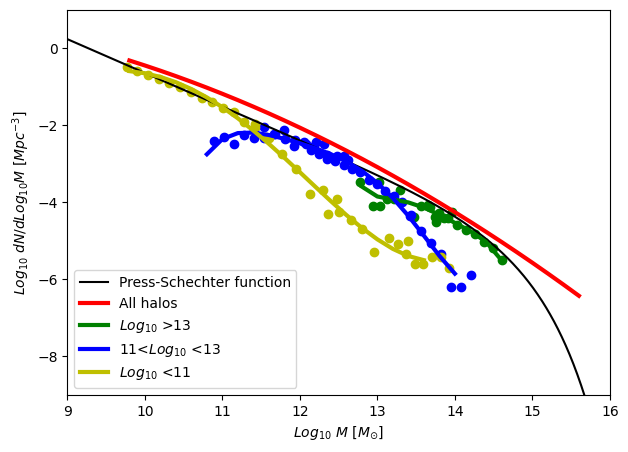

In [19]:
h = 0.6774
### Press-Schechter function ###
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)
hm = TracerHaloModel(z=0, hmf_model="PS")
ax.plot(np.log10(hm.m/h),np.log10(hm.dndm*(hm.m * np.log(10))* h**4), color='black', label='Press-Schechter function')

# ax.scatter(Allhmf[:,0], Allhmf[:,1])
ax.plot(x, y, color='r', linewidth=3, label='All halos')
ax.scatter(hmf_a1[:,0], hmf_a1[:,1], color='g')
ax.plot(x1, y1, color='g', linewidth=3, label='$Log_{10}~\alpha$>13')
ax.scatter(hmf_a2[:,0], hmf_a2[:,1], color='b')
ax.plot(x2, y2, color='b', linewidth=3, label='11<$Log_{10}~\alpha$<13')
ax.scatter(hmf_a3[:,0], hmf_a3[:,1], color='y')
ax.plot(x3, y3, color='y', linewidth=3, label='$Log_{10}~\alpha$<11')

plt.legend(fontsize=10,loc='lower left')
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[Mpc^{-3}]$')
ax.set_xlim((9,16))
ax.set_ylim((-9,1))
# plt.savefig('figures/hmf_zform.png', bbox_inches='tight')

In [20]:
datasets = [S1, S2, S3, S4, S5, S6]
# datasets = [SS1, SS2, SS3, SS4, SS5, SS6]
numbins_list = []
# labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

# all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
Allhmf = np.empty((0, 2)) 
Allhmf1 = np.empty((0, 2)) 
Allhmf2 = np.empty((0, 2)) 
Allhmf3 = np.empty((0, 2)) 
dlm = 0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = (np.max(np.log10(dataset[:,1])) - np.min(np.log10(dataset[:,1]))) / dlm
    (num, lmbins) = np.histogram(np.log10(dataset[:,1]) + 10, bins=20)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:15]
        ldndlm = ldndlm[1:15]
    elif idx == 2:
        lm = lm[10:15]
        ldndlm = ldndlm[10:15]
    elif idx == 3:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 4:
        lm = lm[10:18]
        ldndlm = ldndlm[10:18]
    elif idx == 5:
        lm = lm[10:19]
        ldndlm = ldndlm[10:19]
    elif idx == 6:
        lm = lm[15:]
        ldndlm = ldndlm[15:]
    data = np.column_stack((lm, ldndlm))
    Allhmf = np.vstack((Allhmf, data))

###################################################
    zform = dataset[:,39]
    con1 = (zform>0) & (zform<1)
    numbins1 = (np.max(np.log10(dataset[:,1][con1])) - np.min(np.log10(dataset[:,1][con1]))) / dlm
    (num1, lmbins1) = np.histogram(np.log10(dataset[:,1][con1]) + 10, bins=20)
    lm1 = np.array([])
    for i in range(len(lmbins1)-1):
        lm1 = np.append(lm1, 0.5 * (lmbins1[i] + lmbins1[i+1]))
    ldndlm1 = np.log10(num1 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm1 = lm1[1:12]
        ldndlm1 = ldndlm1[1:12]
    elif idx == 2:
        lm1 = lm1[3:14]
        ldndlm1 = ldndlm1[3:14]
    elif idx == 3:
        lm1 = lm1[10:14]
        ldndlm1 = ldndlm1[10:14]
    elif idx == 4:
        lm1 = lm1[9:15]
        ldndlm1 = ldndlm1[9:15]
    elif idx == 5:
        lm1 = lm1[8:15]
        ldndlm1 = ldndlm1[8:15]
    elif idx == 6:
        lm1 = lm1[12:]
        ldndlm1 = ldndlm1[12:]
    data1 = np.column_stack((lm1, ldndlm1))
    Allhmf1 = np.vstack((Allhmf1, data1))

############################################
    con2 = (zform>1) & (zform<2)
    numbins2 = (np.max(np.log10(dataset[:,1][con2])) - np.min(np.log10(dataset[:,1][con2]))) / dlm
    (num2, lmbins2) = np.histogram(np.log10(dataset[:,1][con2]) + 10, bins=20)
    lm2 = np.array([])
    for i in range(len(lmbins2)-1):
        lm2 = np.append(lm2, 0.5 * (lmbins2[i] + lmbins2[i+1]))
    ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm2 = lm2[1:15]
        ldndlm2 = ldndlm2[1:15]
    elif idx == 2:
        lm2 = lm2[5:15]
        ldndlm2 = ldndlm2[5:15]
    elif idx == 3:
        lm2 = lm2[5:18]
        ldndlm2 = ldndlm2[5:18]
    elif idx == 4:
        lm2 = lm2[10:18]
        ldndlm2 = ldndlm2[10:18]
    elif idx == 5:
        lm2 = lm2[10:19]
        ldndlm2 = ldndlm2[10:19]
    elif idx == 6:
        lm2 = lm2[15:]
        ldndlm2 = ldndlm2[15:]
    data2 = np.column_stack((lm2, ldndlm2))
    Allhmf2 = np.vstack((Allhmf2, data2))

##############################################
    con3 = (zform>2) 
    numbins3 = (np.max(np.log10(dataset[:,1][con3])) - np.min(np.log10(dataset[:,1][con3]))) / dlm
    (num3, lmbins3) = np.histogram(np.log10(dataset[:,1][con3]) + 10, bins=20)
    lm3 = np.array([])
    for i in range(len(lmbins3)-1):
        lm3 = np.append(lm3, 0.5 * (lmbins3[i] + lmbins3[i+1]))
    ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)

    if idx == 1:
        lm3 = lm3[1:15]
        ldndlm3 = ldndlm3[1:15]
    elif idx == 2:
        lm3 = lm3[5:15]
        ldndlm3 = ldndlm3[5:15]
    elif idx == 3:
        lm3 = lm3[5:18]
        ldndlm3 = ldndlm3[5:18]
    elif idx == 4:
        lm3 = lm3[15:18]
        ldndlm3 = ldndlm3[15:18]
    elif idx == 5:
        lm3 = lm3[16:]
        ldndlm3 = ldndlm3[16:]
    elif idx == 6:
        lm3 = lm3[20:]
        ldndlm3 = ldndlm3[20:]

    data3 = np.column_stack((lm3, ldndlm3))
    Allhmf3 = np.vstack((Allhmf3, data3))
print(Allhmf.shape, Allhmf1.shape, Allhmf2.shape, Allhmf3.shape)

(35, 2) (32, 2) (45, 2) (40, 2)


/tmp/ipykernel_1610325/4057081280.py:109: RuntimeWarning: divide by zero encountered in log10
  ldndlm3 = np.log10(num3 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/4057081280.py:79: RuntimeWarning: divide by zero encountered in log10
  ldndlm2 = np.log10(num2 / dataset[1, 28]**3 / dlm)
/tmp/ipykernel_1610325/4057081280.py:19: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


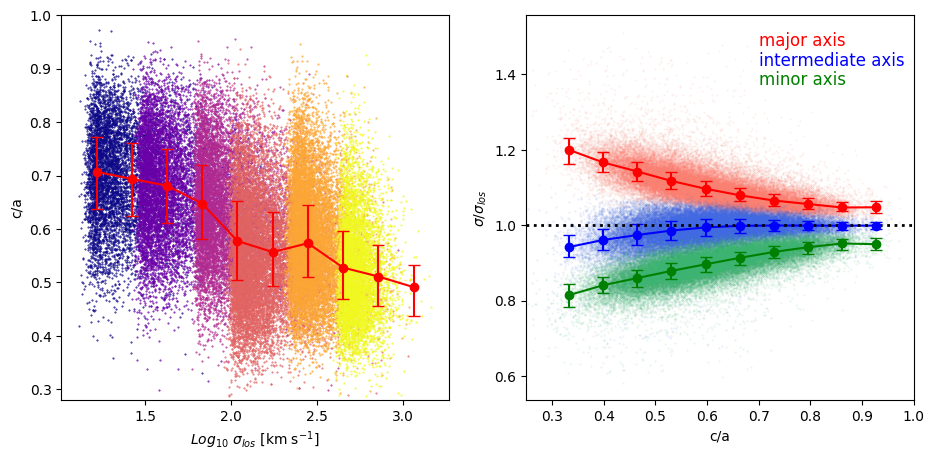

In [21]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])
all_veldisp_1d = np.concatenate([dataset[:, 14] for dataset in datasets])
all_veldisp_major = np.concatenate([dataset[:, 15] for dataset in datasets])
all_veldisp_semi = np.concatenate([dataset[:, 16] for dataset in datasets])
all_veldisp_minor = np.concatenate([dataset[:, 17] for dataset in datasets])

all_c_a = np.concatenate([dataset[:, 19] for dataset in datasets])
all_b_a = np.concatenate([dataset[:, 20] for dataset in datasets])

y = all_c_a
x = np.log10(all_veldisp_1d)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    y_values = dataset[:, 19]
    x_values = np.log10(dataset[:, 14])
    ax.scatter(x_values, y_values, s=0.2, color=color)
    
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

ax.set_ylabel(r"c/a")
ax.set_xlabel(r'$Log_{10}~\sigma_{los}$ [km s$^{-1}$]')
plt.ylim(0.28,1)
##################################################

ax=fig.add_subplot(1,2,2)

x = all_c_a
y = all_veldisp_major/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 15]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='salmon')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')

######################
x = all_c_a
y = all_veldisp_semi/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 16]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='royalblue')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='b', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='b')

####################
x = all_c_a
y = all_veldisp_minor/all_veldisp_1d
num_bins = 10
bin_edges = np.linspace(np.min(0.3), np.max(0.96), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 19]
    y_values = dataset[:, 17]/dataset[:,14]
    ax.scatter(x_values, y_values, s=0.1, alpha=0.2, color='mediumseagreen')
ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='g', capsize=4)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='g')

plt.axhline(1,color="black",linestyle=":",lw=2)
plt.xlim(0.25,1)

ax.set_xlabel(r"c/a")
ax.set_ylabel(r"$\sigma/\sigma_{los}$")
label = ['major axis','intermediate axis','minor axis']
colors = ['r', 'b', 'g']
for i in range(3):
    ax.text(0.6, 0.92 - i * 0.05, label[i], size=12, color=colors[i], transform=ax.transAxes)

# plt.savefig('figures/veldisp1d_shape.png', bbox_inches='tight')

Text(0, 0.5, 'Number of halos')

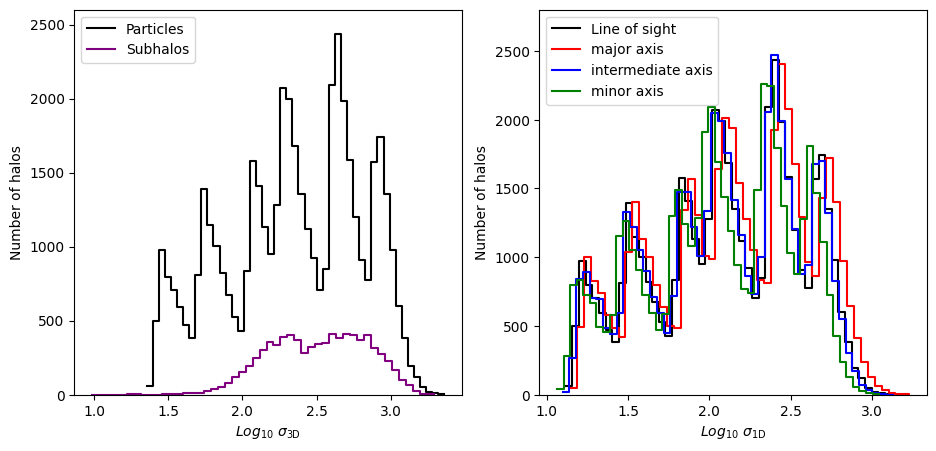

In [22]:
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
all_veldisp_1d = np.concatenate([dataset[:, 14] for dataset in datasets])
all_veldisp_major = np.concatenate([dataset[:, 15] for dataset in datasets])
all_veldisp_semi = np.concatenate([dataset[:, 16] for dataset in datasets])
all_veldisp_minor = np.concatenate([dataset[:, 17] for dataset in datasets])
all_veldisp_v = np.concatenate([dataset[:, 18] for dataset in datasets])
all_veldisp_subhalo = np.concatenate([dataset[:, 34] for dataset in datasets])

# plt.hist(np.log10(all_veldisp_3d), bins=50, color='skyblue', edgecolor='black', linewidth=1.2)

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)

hist1, bins1 = np.histogram(np.log10(all_veldisp_3d), bins=50)
ax.step(bins1[:-1], hist1, where='post', color='black',label='Particles')

all_veldisp_subhalo = np.array(all_veldisp_subhalo)
all_veldisp_subhalo = all_veldisp_subhalo[all_veldisp_subhalo>0]
hist2, bins2 = np.histogram(np.log10(all_veldisp_subhalo), bins=50)
ax.step(bins2[:-1], hist2, where='post', color='purple',label='Subhalos')

plt.ylim(0,2600)
plt.legend(loc='upper left')
ax.set_xlabel(r"$Log_{10}~\sigma_{\rm 3D}$")
ax.set_ylabel(r"Number of halos")

########################################
ax=fig.add_subplot(1,2,2)

hist3, bins3 = np.histogram(np.log10(all_veldisp_1d), bins=50)
ax.step(bins3[:-1], hist3, where='post', color='black',label='Line of sight')

hist4, bins4 = np.histogram(np.log10(all_veldisp_major), bins=50)
ax.step(bins4[:-1], hist4, where='post', color='r',label='major axis')

hist5, bins5 = np.histogram(np.log10(all_veldisp_semi), bins=50)
ax.step(bins5[:-1], hist5, where='post', color='b',label='intermediate axis')

hist6, bins6 = np.histogram(np.log10(all_veldisp_minor), bins=50)
ax.step(bins6[:-1], hist6, where='post', color='g',label='minor axis')

plt.ylim(0,2800)
plt.legend(loc='upper left')
ax.set_xlabel(r"$Log_{10}~\sigma_{\rm 1D}$")
ax.set_ylabel(r"Number of halos")

# plt.savefig('figures/veldisp_distribution.png', bbox_inches='tight')

/tmp/ipykernel_1610325/3666026302.py:7: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_Nsub)
/fred/oz009/mzhang/anaconda/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/tmp/ipykernel_1610325/3666026302.py:26: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])
/tmp/ipykernel_1610325/3666026302.py:38: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])
/tmp/ipykernel_1610325/3666026302.py:46: RuntimeWarning: invalid value encountered in log10
  dataset = dataset[np.log10(dataset[:, 40])+10 !=9]
/tmp/ipykernel_1610325/3666026302.py:47: RuntimeWarning: invalid value encountered in log10
  x_values = np.log10(dataset[:, 40])+10
/tmp/ipykernel_1610325/3666026302.py:48: RuntimeWarning: divide by zero encountered in log10
  y_values = np.log10(dataset[:, 29])


Text(0.5, 0, 'Log$_{10}~(\\alpha$=dM/dz)')

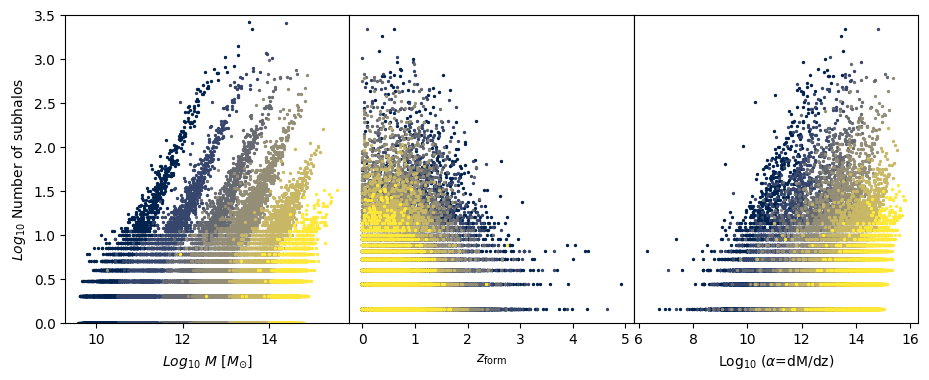

In [23]:
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_accretion = np.concatenate([dataset[:, 40] for dataset in datasets])

x = np.log10(all_M200)+10
y = np.log10(all_Nsub)
num_bins = 10
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)
bin_indices = np.digitize(x, bin_edges) 
# bin_means = [np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)]
# bin_stds = [np.std(y[bin_indices == i]) for i in range(1, num_bins+1)]

bin_medians = np.array([np.median(y[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y[bin_indices == i], 25) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y[bin_indices == i], 75) for i in range(1, num_bins + 1)])

fig=plt.figure(figsize=(11,4))
fig.subplots_adjust(wspace=0)
# fig.subplots_adjust(hspace=0.0)
ax=fig.add_subplot(1,3,1)

colors = plt.cm.cividis(np.linspace(0, 1, len(datasets)))
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = np.log10(dataset[:, 1]) + 10
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
    
# ax.errorbar((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, yerr=[bin_medians - bin_q1, bin_q3 - bin_medians], fmt='o', color='r', capsize=4)
# ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, color='r')
plt.ylim(0, 3.5)
ax.set_xlabel(r'$Log_{10}~M~[M_{\odot}]$')
ax.set_ylabel(r"$Log_{10}$ Number of subhalos")

ax=fig.add_subplot(1,3,2)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    x_values = dataset[:, 39]
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
plt.yticks([])
ax.set_xlabel(r"$z_{\rm form}$")


ax=fig.add_subplot(1,3,3)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    dataset = dataset[np.log10(dataset[:, 40])+10 !=9]
    x_values = np.log10(dataset[:, 40])+10
    y_values = np.log10(dataset[:, 29])
    ax.scatter(x_values, y_values, s=2, color=color)
plt.yticks([])
ax.set_xlabel(r"Log$_{10}~(\alpha$=dM/dz)")

# plt.savefig('figures/number_of_subhalos.png', bbox_inches='tight')

/tmp/ipykernel_1610325/3904974022.py:9: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub)
/tmp/ipykernel_1610325/3904974022.py:22: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
/tmp/ipykernel_1610325/3904974022.py:35: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
/tmp/ipykernel_1610325/3904974022.py:44: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")


Text(0, 0.5, '$Log_{10}~\\sigma$ [km s$^{-1}$]')

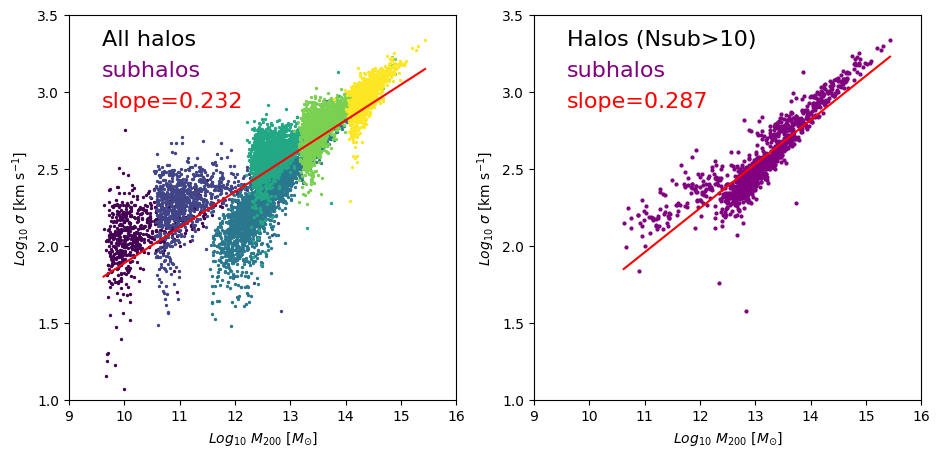

In [24]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])

x = np.log10(all_M200) + 10
y = np.log10(all_veldisp_3d_sub)

valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)
for idx, (dataset, color) in enumerate(zip(datasets, colors), start=1):
    ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]), s=2, color=color)
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit')  
plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'All halos', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# ax.legend(fontsize=16, loc='upper left')

#############################################
x = np.log10(all_M200[all_Nsub>10]) + 10
y = np.log10(all_veldisp_3d_sub[all_Nsub>10])
valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
x = x[valid_indices]
y = y[valid_indices]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
best_fit_x = np.linspace(min(x), max(x), 100)
best_fit_y = slope * best_fit_x + intercept

ax=fig.add_subplot(1,2,2)
ax.scatter(np.log10(all_M200[all_Nsub>10])+10, np.log10(all_veldisp_3d_sub[all_Nsub>10]), s=4, color="purple", label="Halos (Nsub>10)")
plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit') 
plt.ylim(1,3.5) 
plt.xlim(9,16) 
ax.text(9.6,3.3,'Halos (Nsub>10)', size=16, color='black')
ax.text(9.6,3.1,'subhalos', size=16, color='purple')
ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')

# plt.savefig('figures/veldisp_subhalo_mass.png')

In [25]:
print(np.max(np.log10(dataset[:,34])), np.min(np.log10(dataset[:,34])))

3.3379156526427427 -inf


/tmp/ipykernel_1610325/4013290038.py:1: RuntimeWarning: divide by zero encountered in log10
  print(np.max(np.log10(dataset[:,34])), np.min(np.log10(dataset[:,34])))


/tmp/ipykernel_1610325/1832219304.py:45: RuntimeWarning: divide by zero encountered in log10
  numbins = int((np.max(np.log10(dataset[:,34])) - np.min(np.log10(dataset[:,34][dataset[:, 34] > 0]))) / dlm)
/tmp/ipykernel_1610325/1832219304.py:50: RuntimeWarning: divide by zero encountered in log10
  ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)


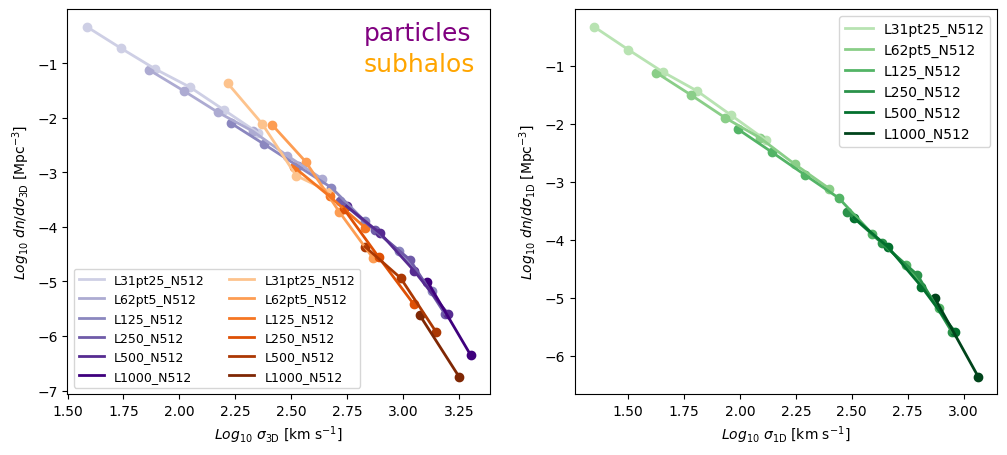

In [26]:
datasets = [S1, S2, S3, S4, S5, S6]

numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.Purples(np.linspace(0.3, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)

dlm=0.15
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,13])) - np.min(np.log10(dataset[:,13]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,13]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 2:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 3:
        lm = lm[1:9]
        ldndlm = ldndlm[1:9]
    elif idx == 4:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 5:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 6:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
        
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)

colors = plt.cm.Oranges(np.linspace(0.3, 1, len(datasets)))

for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,34])) - np.min(np.log10(dataset[:,34][dataset[:, 34] > 0]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,34][dataset[:, 34] > 0]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[7:]
        ldndlm = ldndlm[7:]
    elif idx == 2:
        lm = lm[9:]
        ldndlm = ldndlm[9:]
    elif idx == 3:
        lm = lm[6:9]
        ldndlm = ldndlm[6:9]
    elif idx == 4:
        lm = lm[5:]
        ldndlm = ldndlm[5:]
    elif idx == 5:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 6:
        lm = lm[4:]
        ldndlm = ldndlm[4:]
        
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)
    
ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma_{\rm 3D}~$[Mpc$^{-3}$]')

label = ['particles','subhalos']
colors = ['purple', 'orange']
for i in range(2):
    ax.text(0.7, 0.92 - i * 0.08, label[i], size=18, color=colors[i], transform=ax.transAxes)
    
plt.legend(ncol=2, prop={'size':9})
#################################################
numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.Greens(np.linspace(0.3, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

ax=fig.add_subplot(1,2,2)

dlm=0.15
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,14])) - np.min(np.log10(dataset[:,14]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,14]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    if idx == 1:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 2:
        lm = lm[1:7]
        ldndlm = ldndlm[1:7]
    elif idx == 3:
        lm = lm[1:9]
        ldndlm = ldndlm[1:9]
    elif idx == 4:
        lm = lm[3:]
        ldndlm = ldndlm[3:]
    elif idx == 5:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
    elif idx == 6:
        lm = lm[1:]
        ldndlm = ldndlm[1:]
        
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)

ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 1D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma_{\rm 1D}$ [Mpc$^{-3}]$')

plt.legend()

plt.savefig('figures/veldisp_function.png')

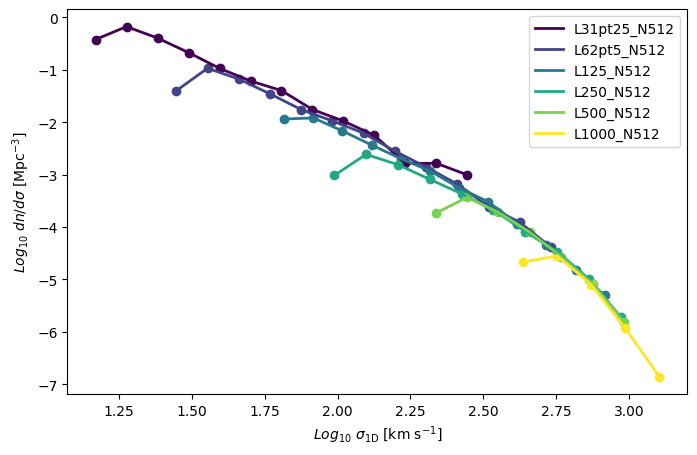

In [27]:
datasets = [S1, S2, S3, S4, S5, S6]

numbins_list = []
labels = ["L31pt25_N512", "L62pt5_N512", "L125_N512", "L250_N512", "L500_N512", "L1000_N512"]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])

fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)

dlm=0.1
for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    numbins = int((np.max(np.log10(dataset[:,14])) - np.min(np.log10(dataset[:,14]))) / dlm)
    (num, lmbins) = np.histogram(np.log10(dataset[:,14]), bins=numbins)
    lm = np.array([])
    for i in range(len(lmbins)-1):
        lm = np.append(lm, 0.5 * (lmbins[i] + lmbins[i+1]))
    ldndlm = np.log10(num / dataset[1, 28]**3 / dlm)
    # if idx == 1:
    #     lm = lm[1:]
    #     ldndlm = ldndlm[1:]
    # elif idx == 2:
    #     lm = lm[1:]
    #     ldndlm = ldndlm[1:]
    # elif idx == 4:
    #     lm = lm[9:]
    #     ldndlm = ldndlm[9:]
    # elif idx == 5:
    #     lm = lm[2:]
    #     ldndlm = ldndlm[2:]
    # elif idx == 6:
    #     lm = lm[12:]
    #     ldndlm = ldndlm[12:]
        
    ax.scatter(lm, ldndlm, color=color)
    ax.plot(lm, ldndlm, linewidth=2, label=label, color=color)

ax.set_xlabel(r'$Log_{10}~\sigma_{\rm 1D}$ [km s$^{-1}$]')
ax.set_ylabel(r'$Log_{10}~dn/d \sigma$ [Mpc$^{-3}]$')

plt.legend()
# plt.show()
# plt.savefig('figures/veldisp1D_function.png')

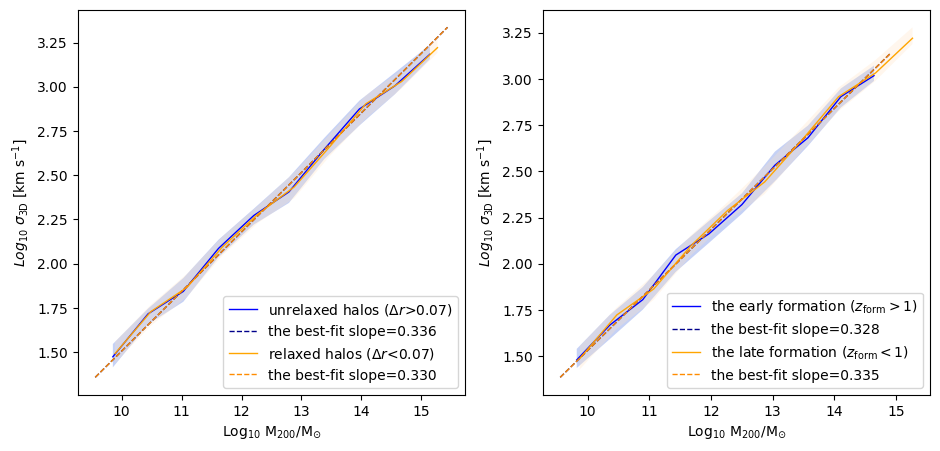

In [28]:
datasets = [S1, S2, S3, S4, S5, S6]
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

all_M200 = np.concatenate([dataset[:, 1] for dataset in datasets])
all_veldisp_3d_sub = np.concatenate([dataset[:, 34] for dataset in datasets])
all_zform = np.concatenate([dataset[:, 39] for dataset in datasets])
all_Nsub = np.concatenate([dataset[:, 29] for dataset in datasets])
all_veldisp_3d = np.concatenate([dataset[:, 13] for dataset in datasets])
all_offset = np.concatenate([dataset[:, 7] for dataset in datasets])

fig=plt.figure(figsize=(11,5))
ax=fig.add_subplot(1,2,1)

x2 = np.log10(all_M200[all_offset>0.07])+10
y2 = np.log10(all_veldisp_3d[all_offset>0.07])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"unrelaxed halos ($\Delta r$>0.07)")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_offset<0.07])+10
y1 = np.log10(all_veldisp_3d[all_offset<0.07])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"relaxed halos ($\Delta r$<0.07)")
ax.plot(best_fit_x2, best_fit_y2, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')


###################################
ax=fig.add_subplot(1,2,2)

x2 = np.log10(all_M200[all_zform>1])+10
y2 = np.log10(all_veldisp_3d[all_zform>1])
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
best_fit_x2 = np.linspace(min(x2), max(x2), 100)
best_fit_y2 = slope * best_fit_x2 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x2), np.max(x2), num_bins+1)
bin_indices = np.digitize(x2, bin_edges) 

bin_medians = np.array([np.median(y2[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y2[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y2[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='royalblue', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='blue', label=r"the early formation ($z_{\rm form}>1$)")
ax.plot(best_fit_x2, best_fit_y2, color='darkblue', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

############
x1 = np.log10(all_M200[all_zform<1])+10
y1 = np.log10(all_veldisp_3d[all_zform<1])
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
best_fit_x1 = np.linspace(min(x1), max(x1), 100)
best_fit_y1 = slope * best_fit_x1 + intercept

num_bins = 10
bin_edges = np.linspace(np.min(x1), np.max(x1), num_bins+1)
bin_indices = np.digitize(x1, bin_edges) 

bin_medians = np.array([np.median(y1[bin_indices == i]) for i in range(1, num_bins + 1)])
bin_q1 = np.array([np.percentile(y1[bin_indices == i], 16) for i in range(1, num_bins + 1)])
bin_q3 = np.array([np.percentile(y1[bin_indices == i], 84) for i in range(1, num_bins + 1)])

# ax.scatter(x1, y1,  s=0.5, alpha=0.1, color='purple')
ax.fill_between((bin_edges[1:] + bin_edges[:-1]) / 2, bin_q1, bin_q3, facecolor='bisque', alpha=0.3)
ax.plot((bin_edges[1:] + bin_edges[:-1]) / 2, bin_medians, linewidth=1, color='orange', label=r"the late formation ($z_{\rm form}<1$)")
ax.plot(best_fit_x2, best_fit_y2, color='darkorange', linewidth=1, linestyle='--', label=f'the best-fit slope={slope:.3f}')

ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
ax.set_ylabel(r'$Log_{10}~\sigma_{\rm 3D}$ [km s$^{-1}$]')
plt.legend(loc='lower right')

####################################


# all_accretion_rate = np.concatenate([dataset[:, 40] for dataset in datasets])

# # group_ranges = [(14, np.inf),(12, 14), (10, 12),(6, 10)]
# group_ranges = [(13, np.inf),(11, 13), (6, 11)]
# fit_results = {}
# # labels= [r"$Log_{10}~\alpha$>14",r"$12<Log_{10}~\alpha$<14",r"$10<Log_{10}~\alpha$<12",r"$Log_{10}~\alpha$<10"]
# labels= [r"$Log_{10}~\alpha$>13",r"$11<Log_{10}~\alpha$<13",r"$Log_{10}~\alpha$<11"]

# colors = plt.cm.plasma(np.linspace(0, 1, len(group_ranges)))

# for i, group_range in enumerate(group_ranges):
#     group_indices = np.where((np.log10(all_accretion_rate)+10 >= group_range[0]) & (np.log10(all_accretion_rate)+10 < group_range[1]))[0]
#     group_M200 = np.log10(all_M200[group_indices]) + 10
#     group_veldisp_3d = np.log10(all_veldisp_3d[group_indices])
    
#     slope_M200, intercept_M200, _, _, _ = linregress(group_M200, group_veldisp_3d)
#     fit_results[group_range] = (slope_M200, intercept_M200)

#     x = group_M200
#     y = group_veldisp_3d
#     valid_indices = np.logical_and(np.isfinite(x), np.isfinite(y))
#     x = x[valid_indices]
#     y = y[valid_indices]
#     slope, intercept, r_value, p_value, std_err = linregress(x, y)
#     best_fit_x = np.linspace(min(x), max(x), 100)
#     best_fit_y = slope * best_fit_x + intercept
#     print(slope)
#     ax.text(0.05, 0.84 + i * 0.05, f'slope={slope:.3f}', size=12, color=colors[i], transform=ax.transAxes)
#     ax.scatter(group_M200, group_veldisp_3d,  s=0.5, alpha=0.1, color=colors[i])
#     # ax.plot(group_M200, slope_M200 * group_M200 + intercept_M200, linewidth=2, color=colors[i])
#     ax.plot(best_fit_x, best_fit_y, color=colors[i], linewidth=1, label=labels[i]) 

# ax.set_xlabel(r"Log$_{10}$ M$_{200}$/M$_{\odot}$")
# ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')
# plt.legend(loc='lower right')

# plt.savefig('figures/mass_veldisp_particles.png')

In [29]:
print(1+1)

2
